In [302]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from scipy.special import gamma

# Bessel process sampling

Course link: https://www.maths.univ-evry.fr/pages_perso/jeanblanc/conferences/Jordanie.pdf

In [303]:
def explicit_bessel(delta, n):
  """
    Bessel process sampling between time [0,1], dimension delta, n points
    Using explicit Euler scheme
  """
  traj = np.zeros(n)
  w = np.random.normal(scale=1/np.sqrt(n), size=n)
  for i in range(1,n):
    traj[i] = traj[i-1] + delta/n + 2*np.sqrt(abs(traj[i-1]))*w[i-1]
  return np.sqrt(abs(traj))

Number of points of the trajectory below 0.1: 7097


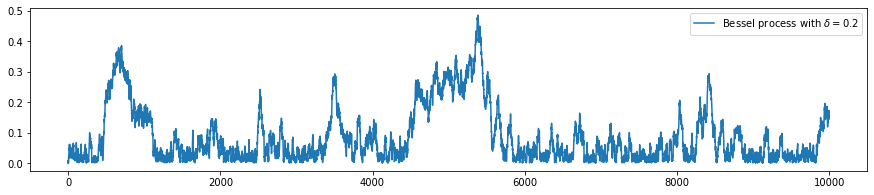

In [ ]:
delta = 0.2
n = 10000
traj = explicit_bessel(delta, n)

print("Number of points of the trajectory below 0.1:", (traj<1e-1).sum())

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(traj, label="Bessel process with $\delta=$"+str(delta))
_ = plt.legend()

Number of points of the trajectory below 0.1: 4377


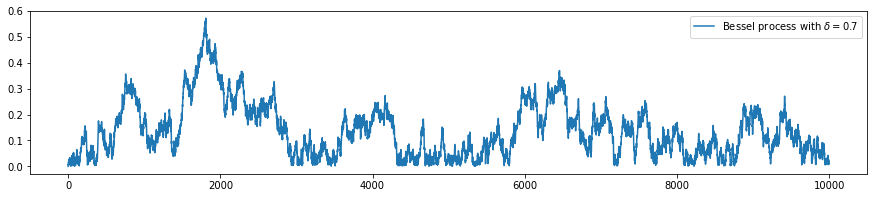

In [ ]:
delta = 0.7
n = 10000
traj = explicit_bessel(delta, n)

print("Number of points of the trajectory below 0.1:", (traj<1e-1).sum())

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(traj, label="Bessel process with $\delta=$"+str(delta))
_ = plt.legend()

Number of points of the trajectory below 0.1: 1462


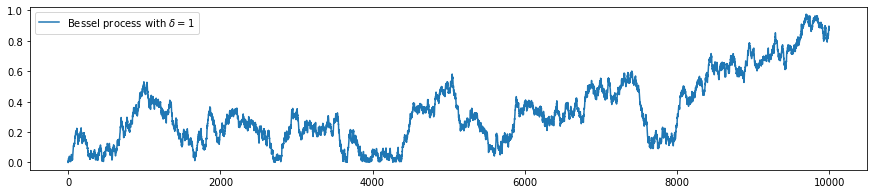

In [ ]:
# Norm of a Brownian motion
delta = 1
n = 10000
traj = explicit_bessel(delta, n)

print("Number of points of the trajectory below 0.1:", (traj<1e-1).sum())

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(traj, label="Bessel process with $\delta=$"+str(delta))
_ = plt.legend()

Number of points of the trajectory below 0.1: 1503


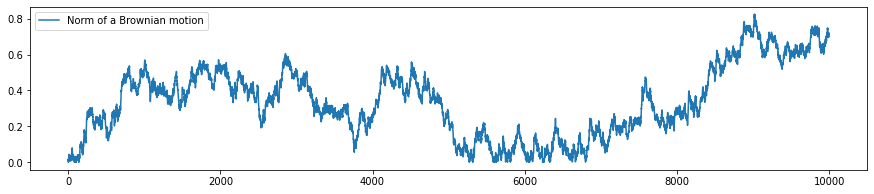

In [ ]:
# Comparison with the exact case of a norm of a Brownian motion
traj = abs(np.cumsum(np.random.normal(scale=1/np.sqrt(n), size=n)))

print("Number of points of the trajectory below 0.1:", (traj<1e-1).sum())

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(traj, label="Norm of a Brownian motion")
_ = plt.legend()

Number of points of the trajectory below 0.1: 658


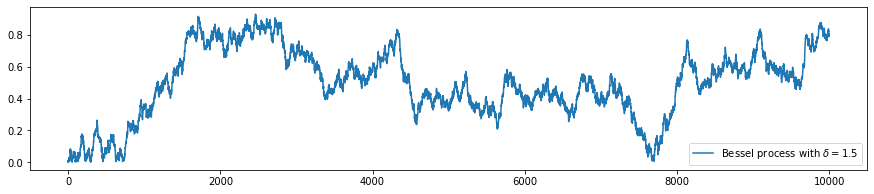

In [ ]:
delta = 1.5
n = 10000
traj = explicit_bessel(delta, n)

print("Number of points of the trajectory below 0.1:", (traj<1e-1).sum())

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(traj, label="Bessel process with $\delta=$"+str(delta))
_ = plt.legend()

Number of points of the trajectory below 0.1: 178


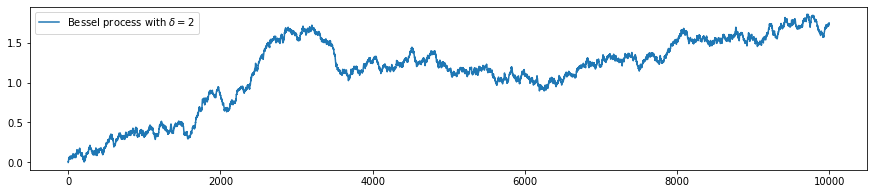

In [ ]:
# Theoretical limit of delta from which the proba of hitting 0 after the initialization in the trajectory is 0
delta = 2
n = 10000
traj = explicit_bessel(delta, n)

print("Number of points of the trajectory below 0.1:", (traj<1e-1).sum())

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(traj, label="Bessel process with $\delta=$"+str(delta))
_ = plt.legend()

Number of points of the trajectory below 0.1: 69


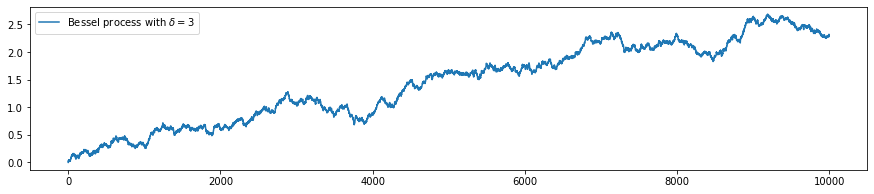

In [ ]:
# Theoretical limit of delta from which the proba of hitting 0 after the initialization in the trajectory is 0
delta = 3
n = 10000
traj = explicit_bessel(delta, n)

print("Number of points of the trajectory below 0.1:", (traj<1e-1).sum())

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(traj, label="Bessel process with $\delta=$"+str(delta))
_ = plt.legend()

As expected, the more the dimension grows, the less excursions around 0 there are. The theoretical limit of $\delta=2$ from which the proba of hitting again 0 is null is well illustrated here.

# Excursion length sorting

In [ ]:
def excursion_lengths(traj, thr=1e-1):
  n = traj.shape[0]
  len_distrib = np.zeros(n)
  zeros = traj<thr
  zeros_ind = (np.cumsum(np.ones(n))-1)[zeros]
  lengths = zeros_ind[1:] - zeros_ind[:-1]
  for i in range(len(lengths)):
    len_distrib[int(lengths[i])] += 1
  return len_distrib

## Cluster length distribution

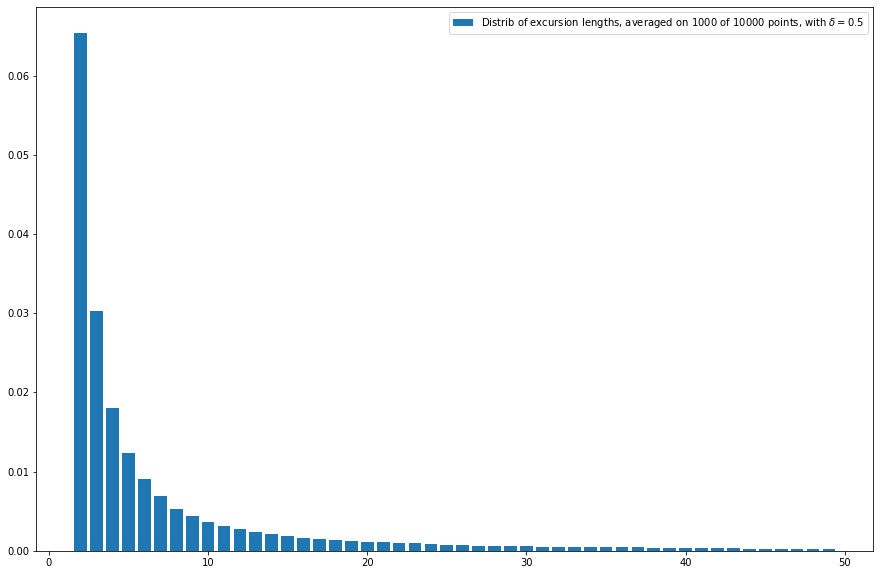

In [ ]:
delta = 0.5
n = 10000
n_trajs = 1000
thr = 2e-2

# Warning on the clusters of size 1, they are more than there should be, due to the discretization of the trajectory (cluster of size 1 contains many excursions of size strictly below too that shouldn't be there), and threshold to detect 0
min_cluster = 1
max_cluster = 50

len_distrib = np.zeros(n)
for i in range(n_trajs):
  traj = explicit_bessel(delta, n)
  len_distrib += excursion_lengths(traj, thr=thr)
len_distrib /= n_trajs
len_distrib /= len_distrib.sum()

fig, ax = plt.subplots(figsize=(15,10))
ax.bar(np.arange(min_cluster,max_cluster), len_distrib[min_cluster:max_cluster], label="Distrib of excursion lengths, averaged on "+str(n_trajs)+" of "+str(n)+" points, with $\delta=$"+str(delta))
_ = plt.legend()

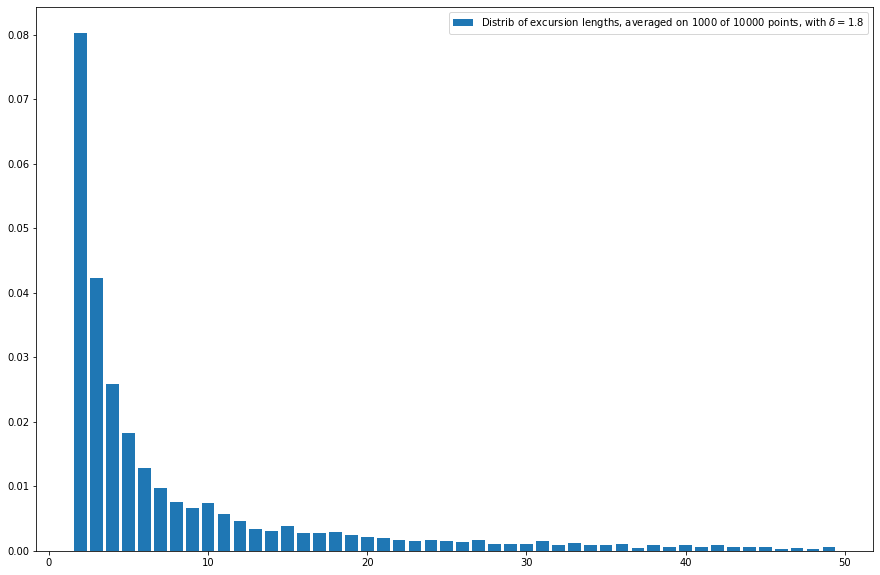

In [ ]:
delta = 1.8
n = 10000
n_trajs = 1000
thr = 2e-2

# Warning on the clusters of size 1, they are more than there should be, due to the discretization of the trajectory (cluster of size 1 contains many excursions of size strictly below too that shouldn't be there), and threshold to detect 0
min_cluster = 1
max_cluster = 50

len_distrib = np.zeros(n)
for i in range(n_trajs):
  traj = explicit_bessel(delta, n)
  len_distrib += excursion_lengths(traj, thr=thr)
len_distrib /= n_trajs
len_distrib /= len_distrib.sum()


fig, ax = plt.subplots(figsize=(15,10))
ax.bar(np.arange(min_cluster,max_cluster), len_distrib[min_cluster:max_cluster], label="Distrib of excursion lengths, averaged on "+str(n_trajs)+" of "+str(n)+" points, with $\delta=$"+str(delta))
_ = plt.legend()

## Evolution of the number of clusters

### Threshold and discretization sensitivity

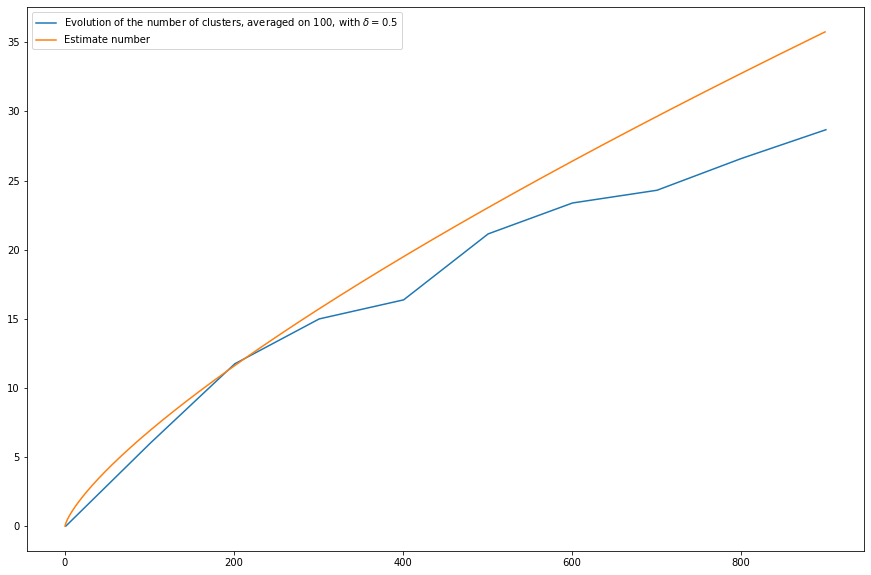

In [ ]:
delta = 0.5 # delta = 2*(1-alpha) ie alpha = 3/4
alpha = 1-delta/2
n_trajs = 100
n_tab = np.arange(1,1000,100)
thr = 1e-1

nb_clusters = np.zeros(len(n_tab))
for i in range(len(n_tab)):
  for j in range(n_trajs):
    traj = explicit_bessel(delta, n_tab[i])
    nb_clusters[i] += excursion_lengths(traj, thr=thr)[2:].sum() # Discard the clusters of length 1, they are more than there should be, due to the discretization of the trajectory (cluster of size 1 contains many excursions of size strictly below too that shouldn't be there), and threshold to detect 0
nb_clusters /= n_trajs

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(np.array(n_tab), nb_clusters, label="Evolution of the number of clusters, averaged on "+str(n_trajs)+", with $\delta=$"+str(delta))
ax.plot(np.arange(n_tab[-1]), np.arange(n_tab[-1])**alpha/alpha/gamma(alpha)/5, label="Estimate number")
_ = plt.legend()

Conclusion : The threshold and the discretization make this way of sampling particularly note conveniant numerically-speaking.

### Special case $\delta=1$

Let's focus on the special case $\delta=1$ where the Bessel process is a 1-D Brownian motion, which will be easier to manipulate

In [304]:
def brownian_excursion_lengths(traj):
  n = traj.shape[0]
  len_distrib = np.zeros(n)
  zeros = np.append(traj[1:]*traj[:-1]<=0, False)
  zeros_ind = (np.cumsum(np.ones(n))-1)[zeros]
  lengths = zeros_ind[1:] - zeros_ind[:-1]
  for i in range(len(lengths)):
    len_distrib[int(lengths[i])] += 1
  return len_distrib

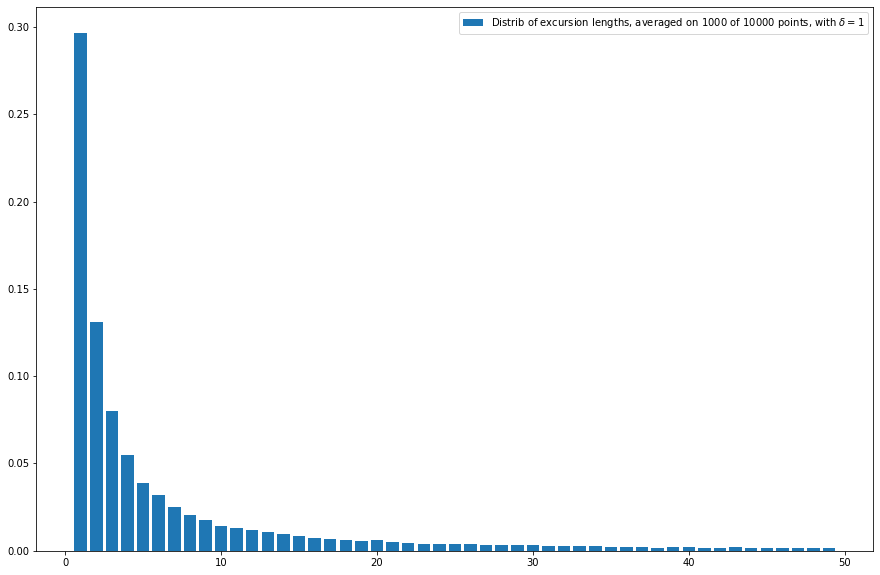

In [305]:
delta = 1
n = 10000
n_trajs = 1000

min_cluster = 1
max_cluster = 50

len_distrib = np.zeros(n)
for i in range(n_trajs):
  traj = np.cumsum(np.random.normal(scale=1/np.sqrt(n), size=n))
  len_distrib += brownian_excursion_lengths(traj)
len_distrib /= n_trajs
len_distrib /= len_distrib.sum()


fig, ax = plt.subplots(figsize=(15,10))
ax.bar(np.arange(min_cluster,max_cluster), len_distrib[min_cluster:max_cluster], label="Distrib of excursion lengths, averaged on "+str(n_trajs)+" of "+str(n)+" points, with $\delta=$"+str(delta))
_ = plt.legend()

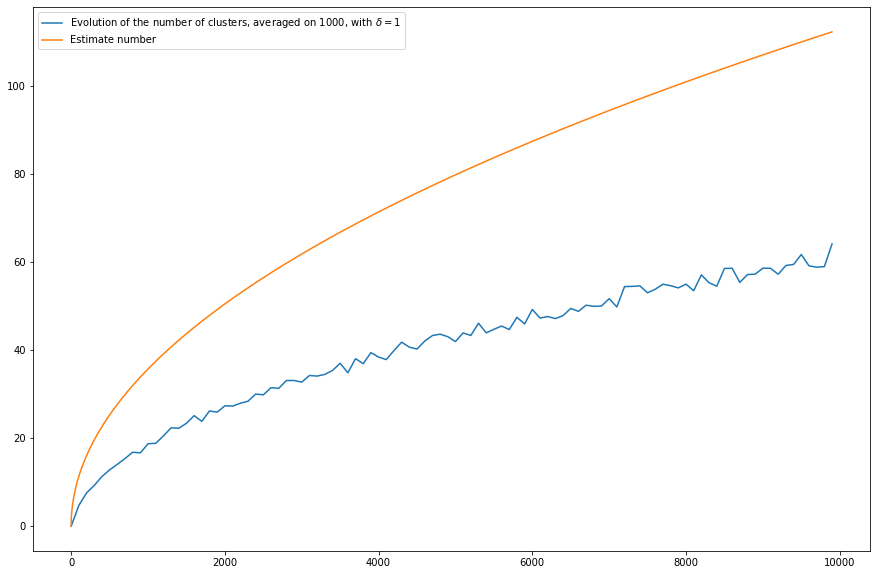

In [307]:
delta = 1 
alpha = 1-delta/2
n_trajs = 1000
n_tab = np.arange(1,10000,100)

nb_clusters = np.zeros(len(n_tab))
for i in range(len(n_tab)):
  for j in range(n_trajs):
    n = n_tab[i]
    traj = np.cumsum(np.random.normal(scale=1/np.sqrt(n), size=n))
    nb_clusters[i] += brownian_excursion_lengths(traj).sum()
nb_clusters /= n_trajs

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(np.array(n_tab), nb_clusters, label="Evolution of the number of clusters, averaged on "+str(n_trajs)+", with $\delta=$"+str(delta))
ax.plot(np.arange(n_tab[-1]), np.arange(n_tab[-1])**alpha/alpha/gamma(alpha), label="Estimate number")
_ = plt.legend()

The result are better in this special case and the computation are much quicker. The average number of cluster is below the theoretical expectation. Indeed, even if working on the Brownian and not the Bessel process is easier to detect excursions, it is still a discretized trajectory: if 2 excursions of same sign are separated by a tiny area (containing 0) between to points of the grid, the all pattern will be considered as only 1 excursion, which obviously diminishes the overall number of clusters.